In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('pesticides.csv')
df.head(3)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0


In [219]:
df2 = df.drop(columns=['Domain', 'Element', 'Item', 'Unit'])
df2.head(3)

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0


In [220]:
df2['Area'].describe()
    



count        4349
unique        168
top       Albania
freq           27
Name: Area, dtype: object

In [221]:
df2['Year'].describe()


count    4349.000000
mean     2003.138883
std         7.728044
min      1990.000000
25%      1996.000000
50%      2003.000000
75%      2010.000000
max      2016.000000
Name: Year, dtype: float64

In [222]:
df2['Value'].describe()


count    4.349000e+03
mean     2.030334e+04
std      1.177362e+05
min      0.000000e+00
25%      9.300000e+01
50%      1.137560e+03
75%      7.869000e+03
max      1.807000e+06
Name: Value, dtype: float64

In [223]:
df2['Value']

0        121.00
1        121.00
2        121.00
3        121.00
4        201.00
         ...   
4344    3375.53
4345    2550.07
4346    2185.07
4347    2185.07
4348    2185.07
Name: Value, Length: 4349, dtype: float64

In [224]:
df2['Value_kg_per_ha'] = df['Value']/10


In [225]:
df2.head(3)

,Area,Year,Value,Value_kg_per_ha
0,Albania,1990,121.0,12.1
1,Albania,1991,121.0,12.1
2,Albania,1992,121.0,12.1


In [226]:
df3 = df2.drop(columns='Value')

In [227]:
df3

,Area,Year,Value_kg_per_ha
0,Albania,1990,12.100
1,Albania,1991,12.100
2,Albania,1992,12.100
3,Albania,1993,12.100
4,Albania,1994,20.100
...,...,...,...
4344,Zimbabwe,2012,337.553
4345,Zimbabwe,2013,255.007
4346,Zimbabwe,2014,218.507
4347,Zimbabwe,2015,218.507


In [228]:
df3['Value_kg_per_ha'].describe()

count      4349.000000
mean       2030.334146
std       11773.619045
min           0.000000
25%           9.300000
50%         113.756000
75%         786.900000
max      180700.000000
Name: Value_kg_per_ha, dtype: float64

In [229]:
df3.head(3)

,Area,Year,Value_kg_per_ha
0,Albania,1990,12.1
1,Albania,1991,12.1
2,Albania,1992,12.1


In [230]:
df3['Value_tonne_per_ha'] = df3['Value_kg_per_ha']/1000
df3

,Area,Year,Value_kg_per_ha,Value_tonne_per_ha
0,Albania,1990,12.100,0.012100
1,Albania,1991,12.100,0.012100
2,Albania,1992,12.100,0.012100
3,Albania,1993,12.100,0.012100
4,Albania,1994,20.100,0.020100
...,...,...,...,...
4344,Zimbabwe,2012,337.553,0.337553
4345,Zimbabwe,2013,255.007,0.255007
4346,Zimbabwe,2014,218.507,0.218507
4347,Zimbabwe,2015,218.507,0.218507


In [239]:
df4 = df3.drop(columns=['Value_kg_per_ha'])


In [240]:
df4.to_csv('pesticides_clean.csv')


In [232]:
df4.sample(10)

,Area,Year,Value_tonne_per_ha
2310,Libya,2003,0.629925
1943,Ireland,2008,0.279017
1236,Ecuador,1995,0.265800
3413,Saudi Arabia,2004,0.370560
1744,Honduras,1998,0.349500
654,Burundi,2002,0.009810
2930,Occupied Palestinian Territory,2003,0.149172
3703,Sweden,2015,0.183620
2532,Mauritania,1994,0.003909
4244,Viet Nam,1995,2.489600


In [233]:
albania_pesticides = df4[df4['Area'] == 'France']
albania_pesticides.head()

,Area,Year,Value_tonne_per_ha
1439,France,1990,9.7701
1440,France,1991,10.3434
1441,France,1992,8.5249
1442,France,1993,9.1953
1443,France,1994,8.9515


In [234]:
df4['Value_tonne_per_ha'].max()

np.float64(180.7)

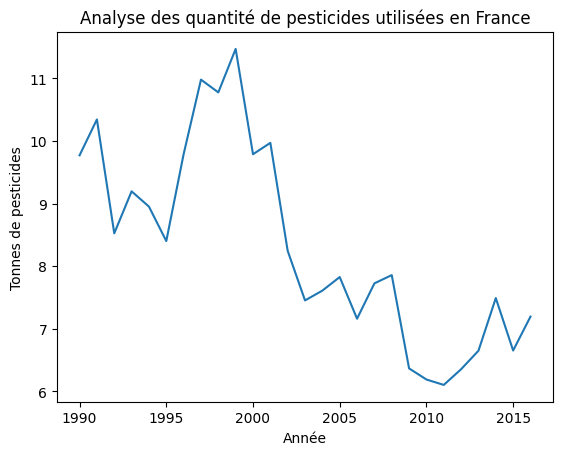

In [235]:
plt.plot(albania_pesticides['Year'],
         albania_pesticides['Value_tonne_per_ha'])

plt.title('Analyse des quantité de pesticides utilisées en France')
plt.xlabel('Année')
plt.ylabel('Tonnes de pesticides')

plt.show()

In [236]:
value_moyen = df4.groupby("Area")["Value_tonne_per_ha"].mean()
value_moyen


Area
Albania                0.072256
Algeria                0.519699
Angola                 0.005691
Antigua and Barbuda    0.001251
Argentina              8.333572
                         ...   
Viet Nam               2.058230
Yemen                  0.062598
Yugoslav SFR           0.271600
Zambia                 0.152541
Zimbabwe               0.307801
Name: Value_tonne_per_ha, Length: 168, dtype: float64

In [237]:
value_moyen.describe()

count    168.000000
mean       2.009741
std       11.210651
min        0.000045
25%        0.015292
50%        0.138923
75%        0.842729
max      137.758652
Name: Value_tonne_per_ha, dtype: float64

TypeError: plot() got an unexpected keyword argument 'x'

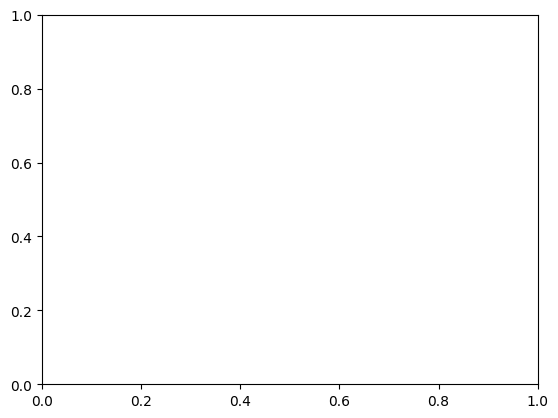

In [238]:
plt.plot(value_moyen, x='Area', y='Value_tonne_per_ha')